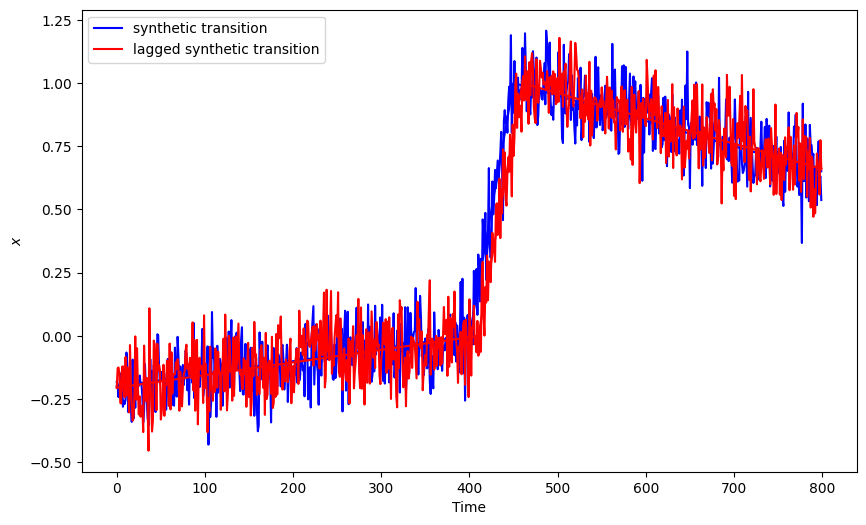

In [137]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import sys
sys.path.append(os.path.join(sys.path[0],'Updated_Method'))
from model import linear_ramp, fit_rmse
from distributions import sample_ar1
from transition_characterization import estimate_transition, combined_transition
#################################################################
# create synthetic transition                                   #
#################################################################

'''We use the linear ramp function from file model.py and the sample_ar1 function from file
distributions.py to create a synthetic transition which we use to demonstrate the ramp
fitting method.'''

delta = 1.0 #Temporal resolution in years
t0 = 400.0 #Year of transition onset
t1=410.0
dt = 50.0 #Transition duration in years
dy = 1.0 #Magnitude of Transition
GS_slope = 5e-4 #Slope during stadial preceding transition in years^-1
GIS_slope = -1e-3 #Slope during interstadial following transition in years^-1
sigma = 0.1 #Variance of AR1 noise
tau = 1.0 #Autocorrelation time of AR1 noise in years

alpha = np.exp(-delta/tau)
time = np.arange(800,step=delta,dtype='float')
trans = linear_ramp(time, t0=t0, dt=dt, y0=0.0, dy = 1.0, GS_slope = GS_slope, GIS_slope = GIS_slope)
trans1 = linear_ramp(time, t0=t1, dt=dt, y0=0.0, dy = 1.0, GS_slope = GS_slope, GIS_slope = GIS_slope)
noise = sample_ar1(len(time), alpha=alpha, sigma=sigma, x0=0) 

# synt_trans = trans + noise
# # generate some gaussian noise with lenght of time

# synt_trans1 = trans1 + noise

# add white noise to the transition
synt_trans = trans + np.random.normal(0, 0.1, len(time))
# generate some gaussian noise with lenght of time

synt_trans1 = trans1 + np.random.normal(0, 0.1, len(time))

df_trans = pd.DataFrame({
    'Time': time,
    'trans': synt_trans,
    'trans1': synt_trans
})

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(time, trans,'b')
ax.plot(time, synt_trans, color='b', label='synthetic transition')

ax.plot(time, trans1,'r')
ax.plot(time, synt_trans1, color='r', label='lagged synthetic transition')
# set x and y labels
ax.set_xlabel('Time')
ax.set_ylabel('$x$')
ax.legend()


ADF Statistic for trans: -1.0777640486169544
p-value for trans: 0.723857406232177
Critical Values:
	1%: -3.438633612472885
	5%: -2.865196199232788
	10%: -2.5687169024206713
Data in trans is not stationary. Differencing the data...


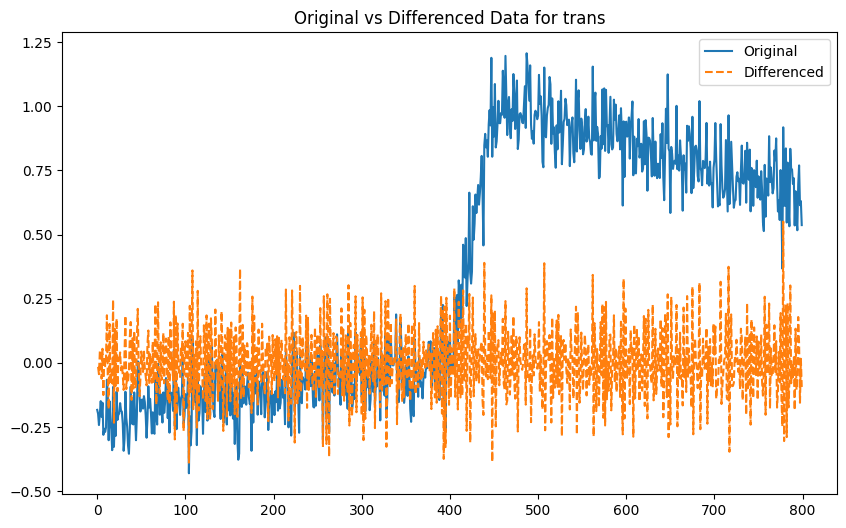

ADF Statistic for trans1: -1.0777640486169544
p-value for trans1: 0.723857406232177
Critical Values:
	1%: -3.438633612472885
	5%: -2.865196199232788
	10%: -2.5687169024206713
Data in trans1 is not stationary. Differencing the data...


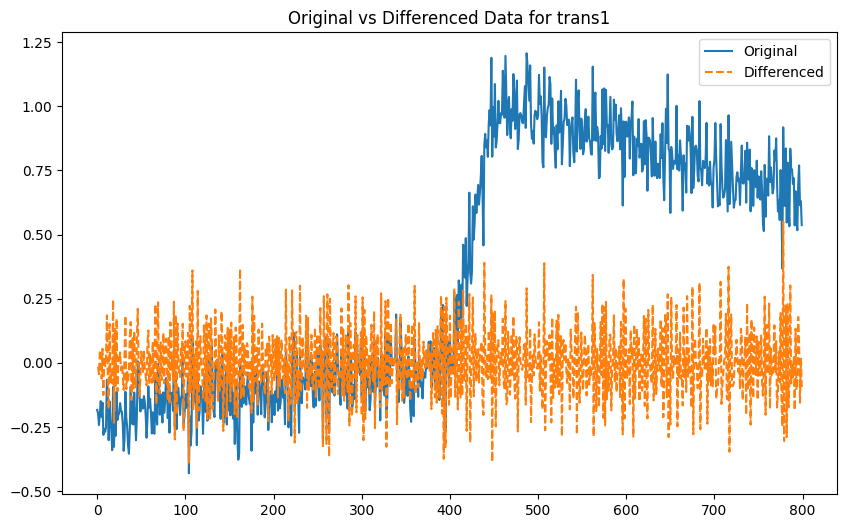

c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
trans => trans1    0.000               1.000                1                False
trans1 => trans    0.000               1.000                1                False



In [138]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

df_trans_copy = GC.check_and_difference(df_trans, ['trans', 'trans1'], plot=True)

result=GC.gc_test(df_trans_copy, 'trans', 'trans1', 50)

ADF Statistic for Series1: -1.697808100156658
p-value for Series1: 0.43224216201051635
Critical Values:
	1%: -3.4996365338407074
	5%: -2.8918307730370025
	10%: -2.5829283377617176
Data in Series1 is not stationary. Differencing the data...


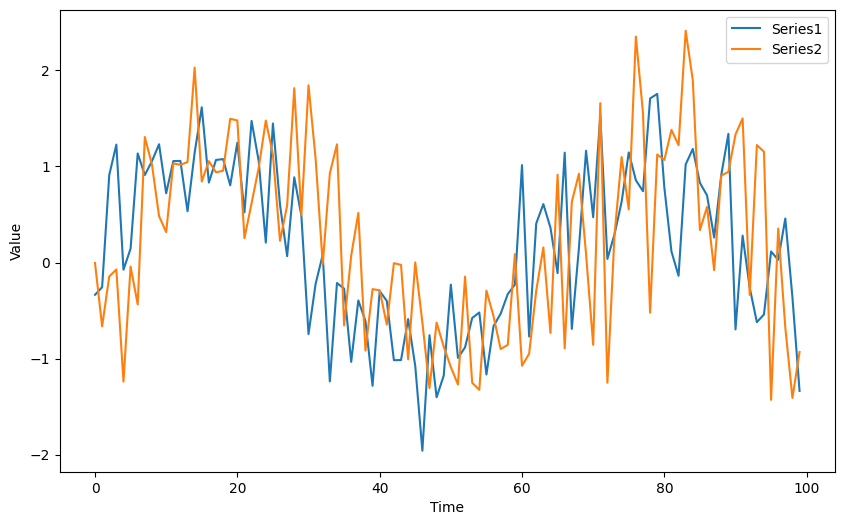

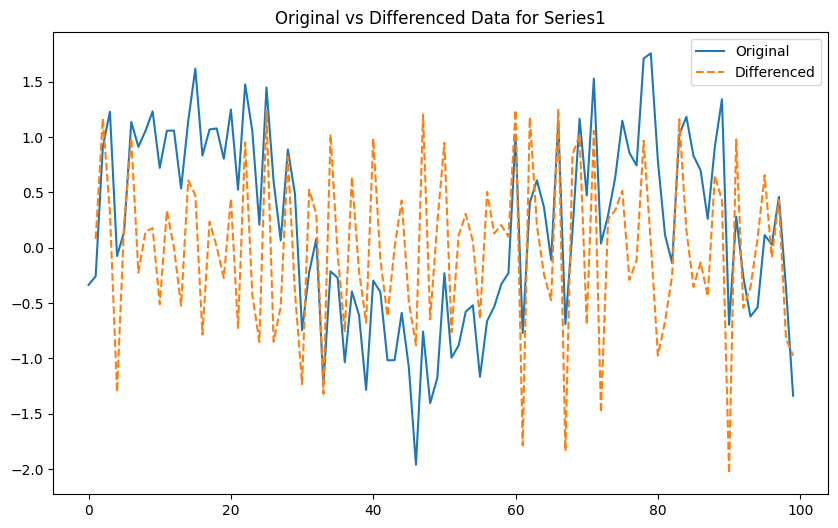

ADF Statistic for Series2: -1.948328663959319
p-value for Series2: 0.309678187863276
Critical Values:
	1%: -3.4996365338407074
	5%: -2.8918307730370025
	10%: -2.5829283377617176
Data in Series2 is not stationary. Differencing the data...


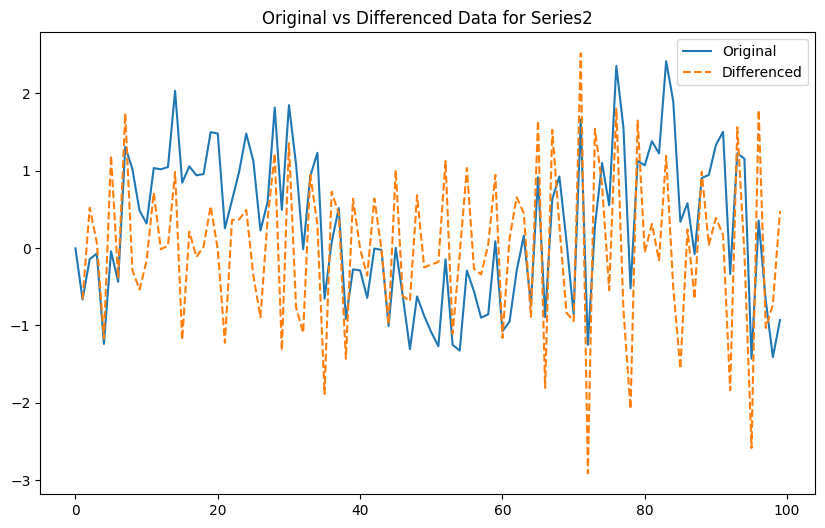

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
Series1 => Series2    6.207               0.014                1                True
Series2 => Series1    9.120               0.000                4                True



c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\zps19\.conda\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [134]:
import matplotlib.pyplot as plt
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)


# Generate synthetic time series data
# np.random.seed(42)  # For reproducibility
n_points = 100
time = np.arange(n_points)
series_1 = np.sin(time / 10) + np.random.normal(0, 0.5, n_points)  # Base series
series_2 = np.roll(series_1, 5) + np.random.normal(0, 0.5, n_points)  # Lagged and noisy version of series_1
# plot the time series
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(time, series_1, label='Series1')
ax.plot(time, series_2, label='Series2')
# set x and y labels
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()

# Create DataFrame
data = pd.DataFrame({'Time': time, 'Series1': series_1, 'Series2': series_2})

data_copy = GC.check_and_difference(data, ['Series1', 'Series2'], plot=True)


# Perform Granger Causality test on the differenced data
gc_result = GC.gc_test(data_copy.dropna(), 'Series1', 'Series2', max_lags=4)

